# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [3]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [222]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [223]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.linalg.norm(X @ w - y) ** 2 / len(y)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return X.T @ (X @ w - y) * 2 / len(y)


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [224]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [225]:
def gradient_descent(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        lr: float,
        n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    iterations = [w_init]
    for _ in range(n_iterations):
        iterations.append(iterations[-1] - lr * loss.calc_grad(X, y, iterations[-1]))
    return iterations

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [226]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [227]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649494


In [228]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

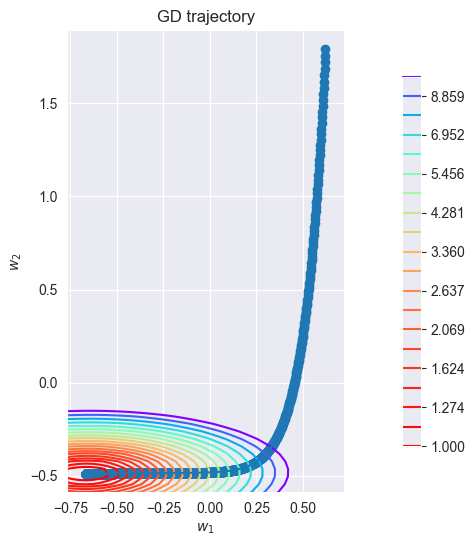

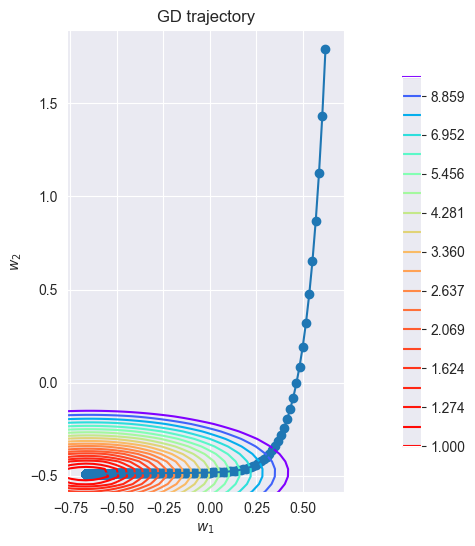

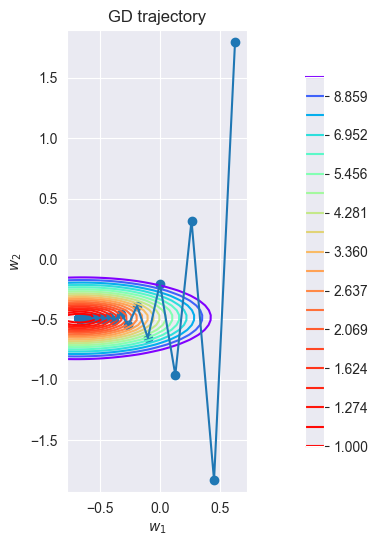

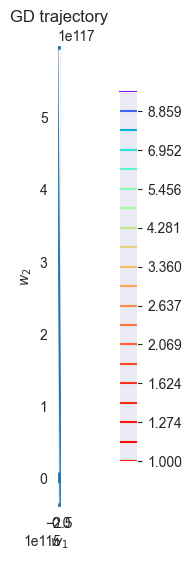

In [229]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.0001, 10000), X, y, loss)
plot_gd(gradient_descent(w_init, X, y, loss, 0.001, 10000), X, y, loss)
plot_gd(gradient_descent(w_init, X, y, loss, 0.01, 10000), X, y, loss)
# lr при больших значениях и при большом количестве шагов ломается, 
# так как ошибка начинает всё больше и больше увеличивается
# из-за чего статическая переменная переполняется и становится nan
# поэтому возьму для графика с шагом 0.1 100 итераций
# на которых тяжело понять что происходит, но вроде ошибка увеличивается и увеличивается
plot_gd(gradient_descent(w_init, X, y, loss, 0.1, 100), X, y, loss)

# Таким образом при низком параметре шага модель может обучаться слишком долго или
# вовсе может недообучиться при недостаточном количестве итераций
# При слишком большом шаге в свою очередь модель может начать ухудшаться
# и только увеличивать ошибку.
# Поэтому нужно постараться найти компромисс

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [230]:
def stochastic_gradient_descent(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        lr: float,
        batch_size: int,
        n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    iterations = [w_init]
    for _ in range(n_iterations):
        batch_ids = np.random.choice(len(X), batch_size, replace=False)
        batch_X = X[batch_ids]
        batch_y = y[batch_ids]
        iterations.append(iterations[-1] - lr * loss.calc_grad(batch_X, batch_y, iterations[-1]))
    return iterations

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

'lr=0.0001, batch=1'

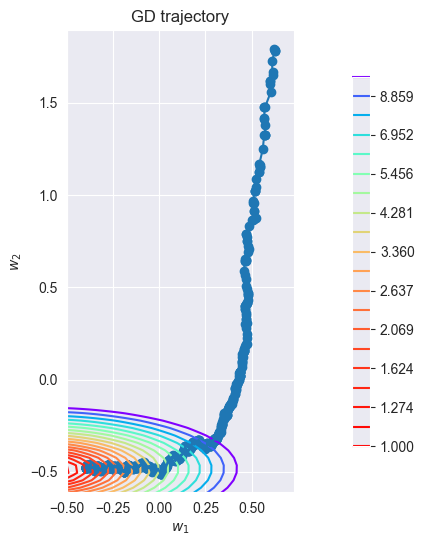

'lr=0.0001, batch=10'

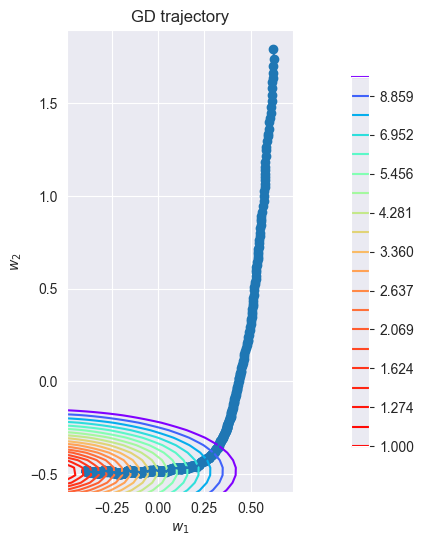

'lr=0.0001, batch=50'

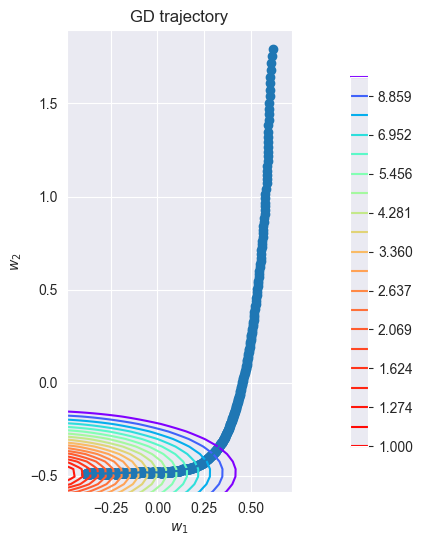

'lr=0.0001, batch=300'

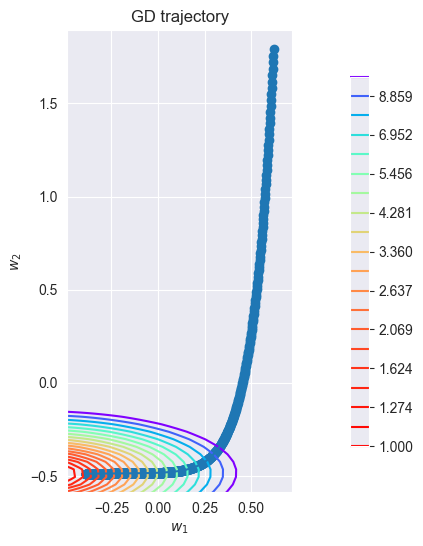

'lr=0.001, batch=1'

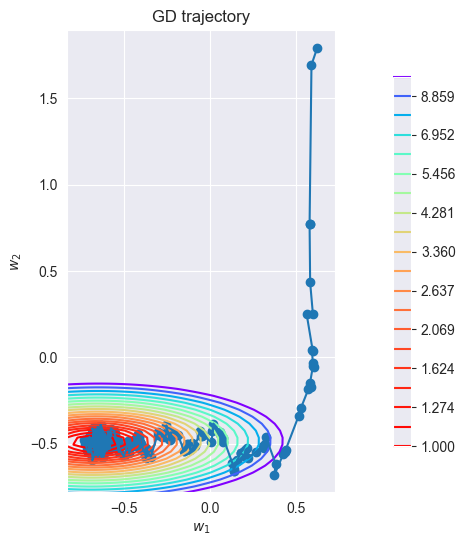

'lr=0.001, batch=10'

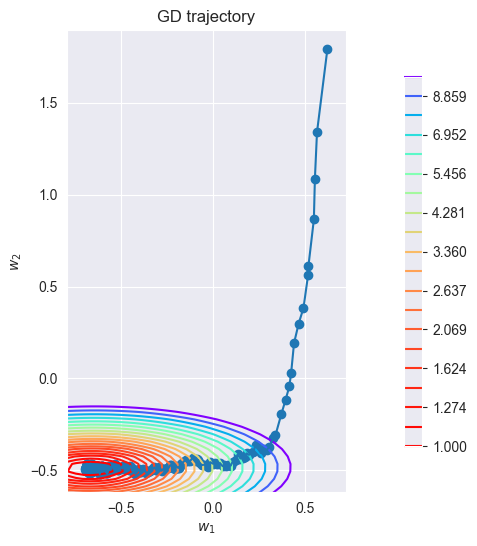

'lr=0.001, batch=50'

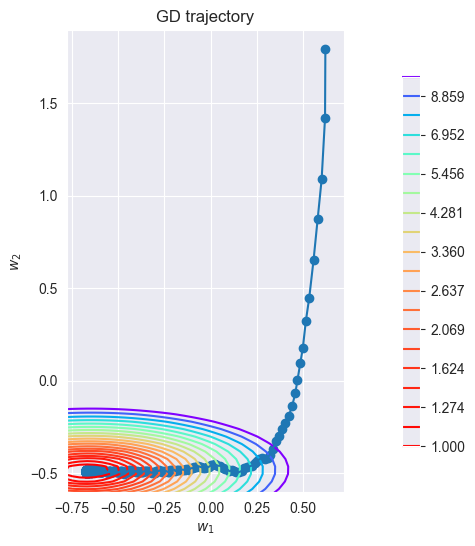

'lr=0.001, batch=300'

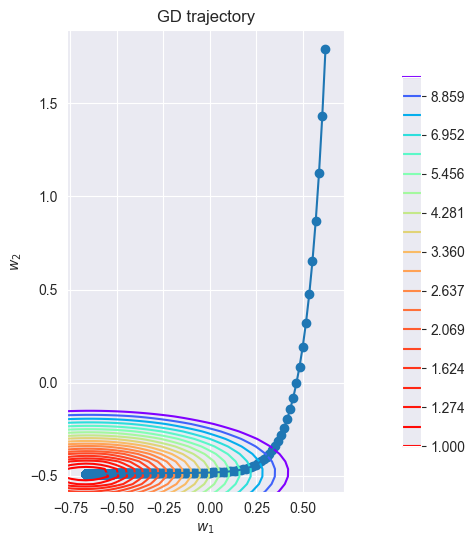

'lr=0.01, batch=1'

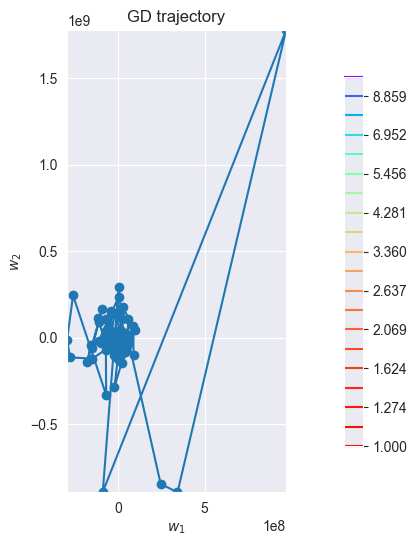

'lr=0.01, batch=10'

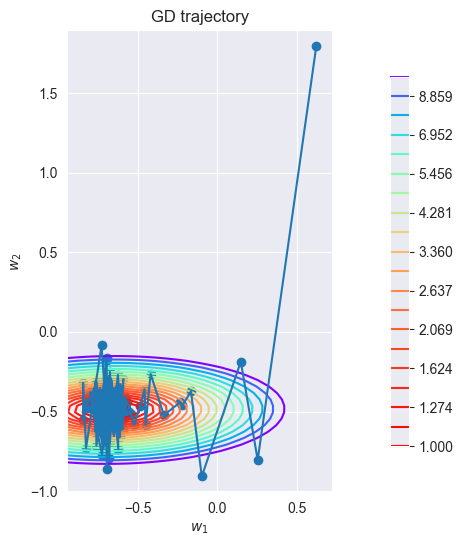

'lr=0.01, batch=50'

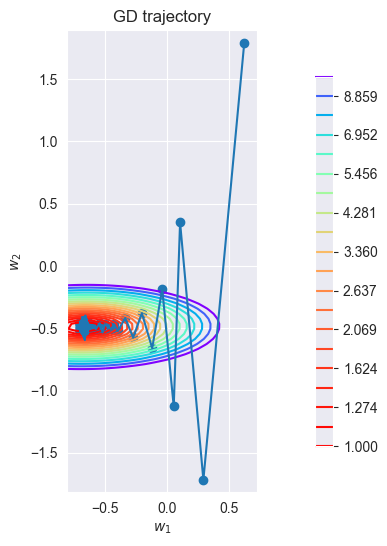

'lr=0.01, batch=300'

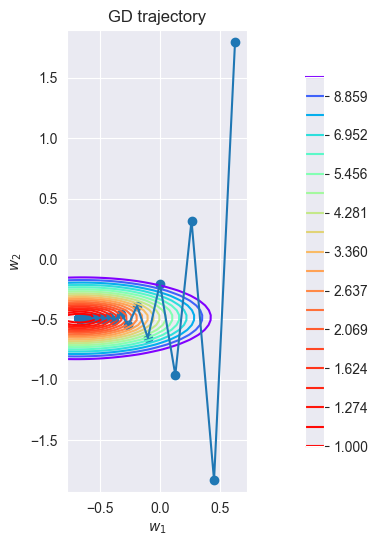

'lr=0.1, batch=1'

C:\Users\Vladimir Luzin\AppData\Local\Temp\ipykernel_20936\1619731036.py:20: RuntimeWarning: overflow encountered in multiply
  return X.T @ (X @ w - y) * 2 / len(y)
C:\Users\Vladimir Luzin\AppData\Local\Temp\ipykernel_20936\1818535038.py:26: RuntimeWarning: invalid value encountered in subtract
  iterations.append(iterations[-1] - lr * loss.calc_grad(batch_X, batch_y, iterations[-1]))


ValueError: Axis limits cannot be NaN or Inf

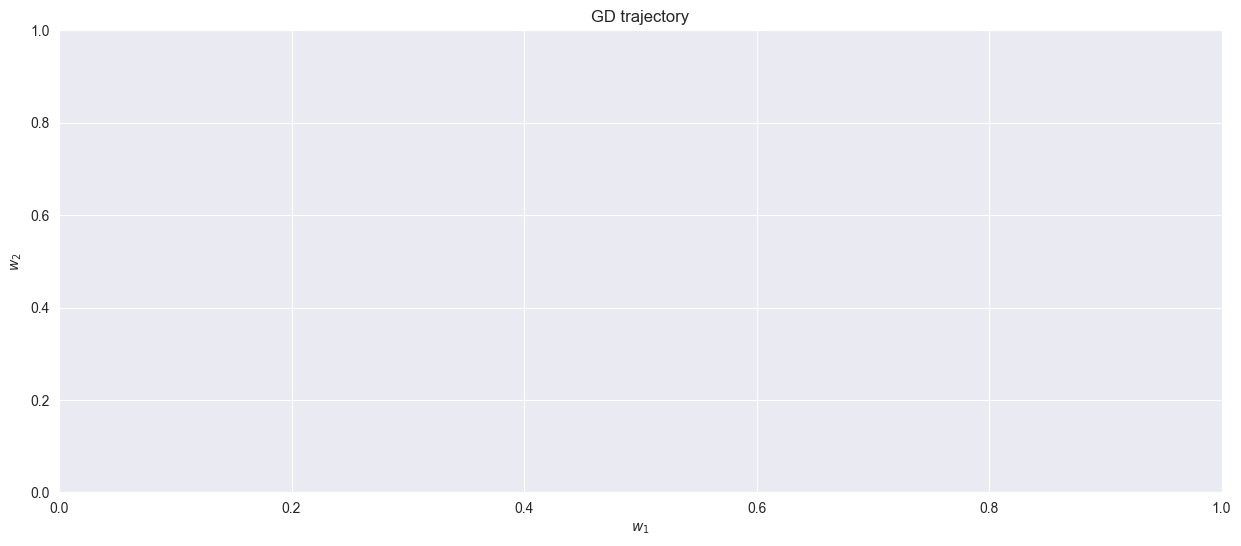

In [231]:
from itertools import product  # для перебора всех вариантов

lrs = [0.0001, 0.001, 0.01, 0.1]
batchs = [1, 10, 50, 300]
for lr in lrs:
    for batch in batchs:
        display(f"{lr=}, {batch=}")
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, 1000), X, y, loss)
        # при lr = 0.1 ошибка становится слишком большой и появляется ошибка. Оставил её для наглядности
# При маленьких batch функцию всё больше "шатает", что не сильно мешает обучению на маленьком шаге,
# но полностью ломает процесс оптимизации при больших шагах
# При больших batch функцию всё меньше мотает из стороны в сторону, но вместе с тем
# она всё становится всё ближе к обычному градиентному спуску со всеми вытекающими в виде долгого обучения

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [232]:
def stochastic_gradient_descent(
        w_init: np.ndarray,
        X: np.ndarray,
        y: np.ndarray,
        loss: BaseLoss,
        lr: float,
        batch_size: int,
        p: float,
        n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s0 = 1  # взял за 1, так как не написано какую брать
    iterations = [w_init]
    for t in range(n_iterations):
        # batch
        batch_ids = np.random.choice(len(X), batch_size, replace=False)
        batch_X = X[batch_ids]
        batch_y = y[batch_ids]
        # step
        step = lr * (s0 / (s0 + t)) ** p
        # iteration
        iterations.append(iterations[-1] - step * loss.calc_grad(batch_X, batch_y, iterations[-1]))
    return iterations

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

'p=0'

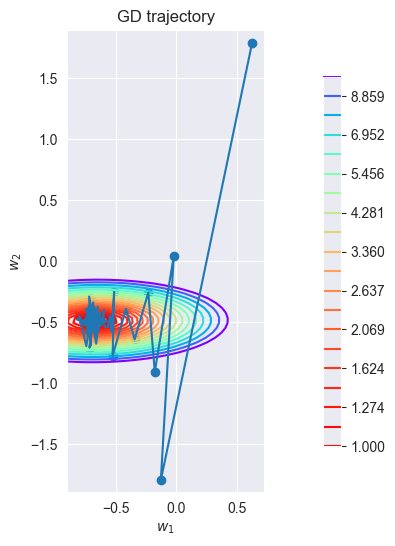

'p=0.1'

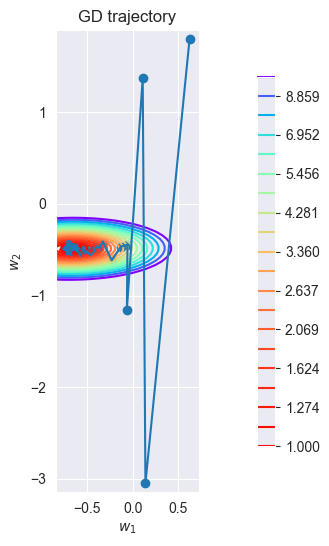

'p=0.4'

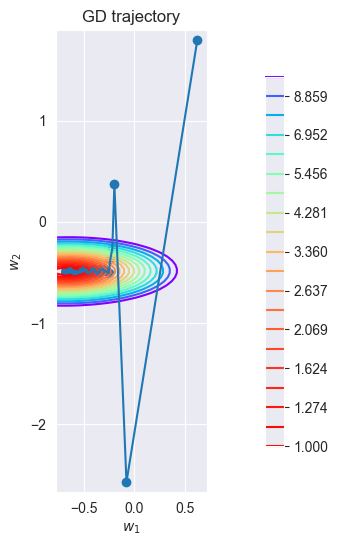

'p=0.7'

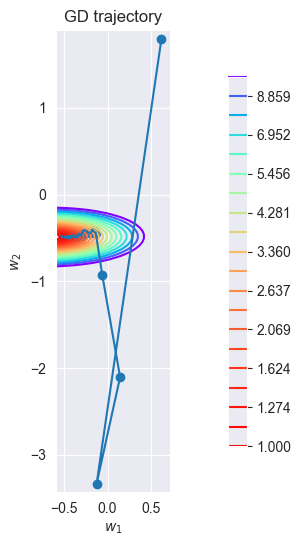

'p=1'

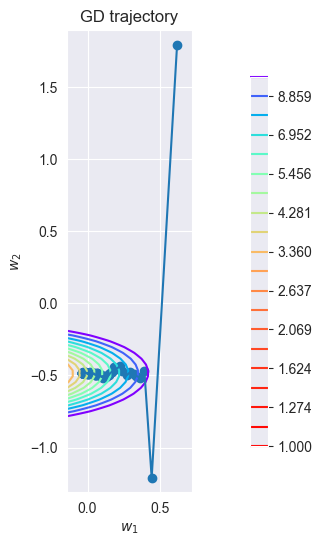

In [233]:
from itertools import product  # для перебора всех вариантов

lr = 0.01
batch = 10
ps = [0, 0.1, 0.4, 0.7, 1]
for p in ps:
    display(f"{p=}")
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch, p, 100), X, y, loss)
# чем больше p, тем быстрее уменьшается длина шага.
# Так, при слишком низком параметре p шаг не замедляется
# А при большом замедляется слишком быстро и минимум не достигается

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

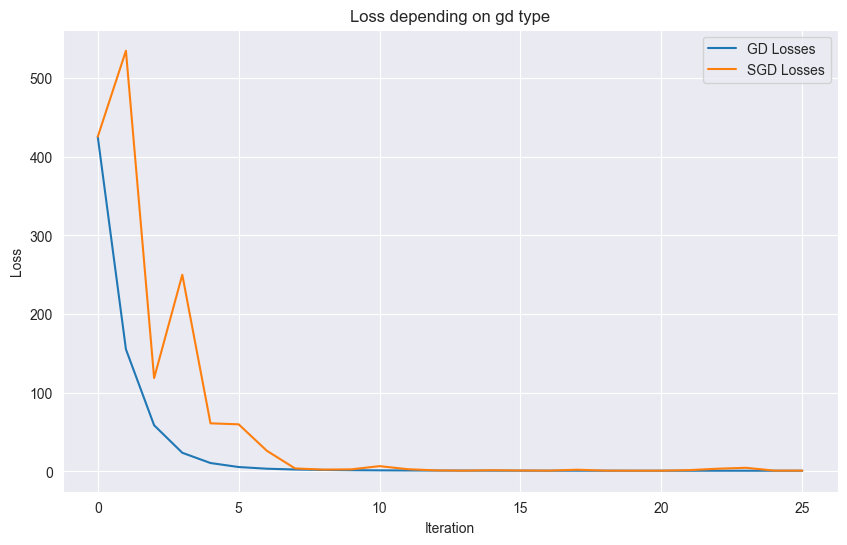

In [237]:
# для стохастического возьму p = 0, чтобы шаги не замедлялись и шаг = 0.01
batch_size = 10
lr = 0.01
p = 0
iterations_amount = 25  # взял меньше итерация для наглядности

gd_iterations = gradient_descent(w_init, X, y, loss, lr, iterations_amount)
sgd_iterations = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, iterations_amount)
iterations = range(iterations_amount + 1)

gd_losses = [loss.calc_loss(X, y, weights) for weights in gd_iterations]
sgd_losses = [loss.calc_loss(X, y, weights) for weights in sgd_iterations]

plt.figure(figsize=(10, 6))
plt.plot(iterations, gd_losses, label='GD Losses')
plt.plot(iterations, sgd_losses, label='SGD Losses')
plt.title('Loss depending on gd type')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# На графике не видно преимущество SGD, поскольку его преимущество выражается
# не в количестве итераций, а в их сложности
# то есть при большем количестве итераций sgd выполниться быстрее

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [238]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01, n_iterations=100) -> None:
        self.loss = loss
        self.lr = lr
        # не сказано сколько нужно делать шагов, поэтому, с учётом того что шаг 0.1 достаточно большой
        # возьму изначально 100 шагов.
        # Нет смысла делать алгоритм с циклом while и заданной точностью, 
        # так как при обучении данная точность не всегда может быть найдена.
        self.n_iterations = n_iterations
        self.w = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        # возможно стоило как-то обрабатывать случай для oneHot кодирования с drop first
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # заменю все bool значения на True = 1, False = 0
        bool_mask = (X == True) | (X == False)
        X[bool_mask] = X[bool_mask].astype(int)
        # и тип данных на вещественный
        X = X.astype(float)
        
        # инициализация случайных весов от 
        self.w = np.random.rand(X.shape[1])

        # Используется не стохастический градиентный спуск, 
        # так что можно не запоминать лучшие веса - последние веса будут лучшими.
        # Не буду запоминать все веса в целях экономии памяти.
        # возможно стоит запускать градиентный спуск несколько раз для разных случайных весов
        # но в задании про это ничего не сказано, так что не буду
        for _ in range(self.n_iterations):
            self.w -= self.lr * self.loss.calc_grad(X, y, self.w.copy())
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # заменю все bool значения на True = 1, False = 0
        bool_mask = (X == True) | (X == False)
        X[bool_mask] = X[bool_mask].astype(int)
        X = X.astype(float)

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [239]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [308]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [309]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [310]:
from sklearn.model_selection import train_test_split  # для разделения

# делаю названия колонок строкой, чтобы избежать дальнейших ошибок
X_raw.columns = X_raw.columns.astype(str)

# удаляю индекс
X_raw = X_raw.drop("index", axis=1)

# регрессия, поэтому для стратификации нужно разделить на бины
# на 8 бинов, так как мало данных
y_bins = pd.qcut(x=y, q=8, labels=False, duplicates="drop")
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, stratify=y_bins)

In [311]:
from sklearn.impute import SimpleImputer

# проверяем на пропуски
display("Количество пропусков до")
display("Трейн: ",X_train.isnull().sum())
display("Тест: ", X_test.isnull().sum()) 
# есть пропуски в столбцах 1, 5, 18, 19, 21,22
display("Таргет: ", y.isnull().sum())
# В вещественных значениях заменяю на медиану: 1,18,19,21,22
# категориальный только 5 с двумя пропусками. Так что эти два значения я заменю строкой "unknown"

# маски числовых значений
X_train_mask = (X_train.dtypes != object).values
X_test_mask = (X_test.dtypes != object).values

# отделю численные значения
X_train_numeric = X_train[X_train.columns[X_train_mask]]
X_test_numeric = X_test[X_test.columns[X_test_mask]]
# заполню численные значения

# Создаём и обучаем SimpleImputer
median_inputer = SimpleImputer(missing_values=np.nan,strategy="median")
median_inputer.fit(X_train_numeric)

# заполняем
X_train[X_train.columns[X_train_mask]] = median_inputer.transform(X_train_numeric)
X_test[X_test.columns[X_test_mask]] = median_inputer.transform(X_test_numeric)

# Заменяю неизвестные категории на "unknown"
X_train = X_train.fillna("unknown")
X_test = X_test.fillna("unknown")

display("Количество пропусков после")
# проверяем на пропуски. Снова
display("Трейн: ",X_train.isnull().sum()) # есть пропуски в столбцах 1, 5, 18, 19, 21,22
display("Тест: ",X_test.isnull().sum()) # есть пропуски в столбцах 1, 5, 18, 19, 21,22
display("Таргет: ",y.isnull().sum())

'Количество пропусков до'

'Трейн: '

0      0
1     26
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     3
19     3
20     0
21     1
22     1
23     0
24     0
dtype: int64

'Тест: '

0      0
1     11
2      0
3      0
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     1
20     0
21     1
22     1
23     0
24     0
dtype: int64

'Таргет: '

0

'Количество пропусков после'

'Трейн: '

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

'Тест: '

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

'Таргет: '

0

In [312]:
from sklearn.preprocessing import StandardScaler
# нормализация
# для нормализации буду использовать StandardScaler
# насколько я помню, он более предпочтителен для линейной регрессии


# маски числовых значений
X_train_mask = (X_train.dtypes != object).values
X_test_mask = (X_test.dtypes != object).values

# отделю численные значения
X_train_numeric = X_train[X_train.columns[X_train_mask]]
X_test_numeric = X_test[X_test.columns[X_test_mask]]


# нормализация
Scaler = StandardScaler()
Scaler.fit(X_train_numeric)
X_train_numeric_scaled = Scaler.transform(X_train_numeric)
X_test_numeric_scaled = Scaler.transform(X_test_numeric)

# заполняем
X_train[X_train.columns[X_train_mask]] = X_train_numeric_scaled
X_test[X_test.columns[X_test_mask]] = X_test_numeric_scaled

display(X_train)
display(X_test)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
25,0.086380,0.730009,dodge,gas,std,four,sedan,fwd,front,-0.815279,...,four,-0.975653,2bbl,-1.309456,-0.202505,-0.188159,-0.999233,0.765381,0.927906,1.125321
200,-1.526041,-0.867827,volvo,gas,turbo,four,sedan,rwd,front,1.748894,...,four,0.368128,mpfi,1.614772,-0.477755,-0.162664,0.285467,0.568589,-0.982488,-0.857336
184,0.892590,-0.897975,volkswagen,gas,std,four,sedan,fwd,front,-0.215861,...,four,-0.475029,mpfi,-0.515221,0.382401,-0.035184,-0.105529,0.765381,0.131908,0.210249
62,-0.719831,-0.174427,mazda,gas,std,four,sedan,rwd,front,1.049574,...,four,0.341780,mpfi,1.542569,-0.443349,-0.545101,0.453036,-0.218580,-0.982488,-0.552312
22,0.086380,-0.174427,dodge,gas,turbo,two,hatchback,fwd,front,-0.815279,...,four,-0.764864,mpfi,-1.092846,0.347995,-0.647085,-0.049672,0.765381,-0.186491,-0.094775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.719831,-0.114131,bmw,gas,std,four,sedan,rwd,front,1.898749,...,six,2.159837,mpfi,1.037147,0.347995,-0.545101,2.184588,0.568589,-1.619286,-1.619896
66,-0.719831,-0.928123,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,1.349283,...,five,1.474772,idi,0.892740,1.208151,2.896839,0.536821,-1.497729,-0.504890,-0.857336
53,1.698800,0.790304,mazda,gas,std,two,hatchback,rwd,front,-0.548871,...,two,-1.502627,4bbl,-0.082002,0.210370,-0.188159,-0.077601,1.749342,-1.300887,-1.162360
41,0.086380,-0.506053,honda,gas,std,two,sedan,fwd,front,-0.349065,...,four,-0.448680,2bbl,-0.659627,1.001714,-0.264647,-0.105529,0.765381,-0.027291,0.057737


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
150,-0.719831,-1.289897,toyota,gas,std,four,wagon,4wd,front,-0.482269,...,four,-0.922956,2bbl,-1.020643,-0.890631,-0.290143,-1.166802,-0.612164,0.291108,0.210249
110,-0.719831,-0.114131,peugot,gas,std,four,wagon,rwd,front,2.598068,...,four,-0.185193,mpfi,0.459521,-3.780756,-0.443118,-0.245170,-0.218580,-0.982488,-1.009848
84,0.086380,0.036608,mitsubishi,gas,turbo,four,sedan,fwd,front,-0.382366,...,four,-0.448680,spdi,-0.587424,0.588839,-0.672581,0.341323,0.765381,-0.345690,-0.094775
73,0.892590,1.121931,mitsubishi,gas,std,two,hatchback,fwd,front,-0.815279,...,four,-0.922956,2bbl,-1.309456,-0.202505,-0.188159,-0.999233,0.765381,1.883103,1.582857
98,-0.719831,0.127052,nissan,gas,std,four,sedan,fwd,front,0.300303,...,six,1.422075,mpfi,0.351217,-0.064880,-0.290143,1.346740,0.175004,-1.300887,-1.314872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-2.332251,-0.626645,volvo,gas,std,four,sedan,rwd,front,0.949672,...,four,0.368128,mpfi,1.614772,-0.477755,-0.162664,0.285467,0.568589,-0.345690,-0.399799
149,-0.719831,-1.410489,toyota,gas,std,four,wagon,fwd,front,-0.482269,...,four,-0.922956,2bbl,-1.020643,-0.890631,-0.290143,-1.166802,-0.612164,0.927906,0.972809
102,1.698800,2.116810,nissan,gas,turbo,two,hatchback,rwd,front,-1.214890,...,six,1.422075,mpfi,0.351217,-0.064880,-0.596093,2.687296,0.175004,-1.300887,-1.162360
52,1.698800,0.790304,mazda,gas,std,two,hatchback,rwd,front,-0.548871,...,two,-1.502627,4bbl,-0.082002,0.210370,-0.188159,-0.077601,1.749342,-1.300887,-1.162360


In [313]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# кодирование категориальных признаков
# Кодирую на всех данных, чтобы обучить на всех категориях
# хотя в реальности скорее всего это было бы неправильно и нужно как-то по другому обрабатывать неизвестные

# создают ColumnTransformer, чтобы применить энкодер только к категориальным типам
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object']).columns.tolist())
    ],
    remainder='passthrough'  # не меняем остальные столбцы
)

encoder.fit(pd.concat([X_train, X_test], axis=0))

X_train = pd.DataFrame(encoder.transform(X_train))
X_test = pd.DataFrame(encoder.transform(X_test))

# использую get_dummies как до этого, который сам игнорирует численные значения
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

display(X_train)
display(X_test)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.231431,-1.112099,-0.975653,-1.309456,-0.202505,-0.188159,-0.999233,0.765381,0.927906,1.125321
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.855431,1.031889,0.368128,1.614772,-0.477755,-0.162664,0.285467,0.568589,-0.982488,-0.857336
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.940609,-0.490682,-0.475029,-0.515221,0.382401,-0.035184,-0.105529,0.765381,0.131908,0.210249
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.386952,0.248624,0.341780,1.542569,-0.443349,-0.545101,0.453036,-0.218580,-0.982488,-0.552312
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.146253,-0.834360,-0.764864,-1.092846,0.347995,-0.647085,-0.049672,0.765381,-0.186491,-0.094775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.196143,1.917058,2.159837,1.037147,0.347995,-0.545101,2.184588,0.568589,-1.619286,-1.619896
136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.599897,1.897077,1.474772,0.892740,1.208151,2.896839,0.536821,-1.497729,-0.504890,-0.857336
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.657321,-0.330832,-1.502627,-0.082002,0.210370,-0.188159,-0.077601,1.749342,-1.300887,-1.162360
138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.061075,-0.504669,-0.448680,-0.659627,1.001714,-0.264647,-0.105529,0.765381,-0.027291,0.057737


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.388636,-0.510664,-0.922956,-1.020643,-0.890631,-0.290143,-1.166802,-0.612164,0.291108,0.210249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.366499,1.477470,-0.185193,0.459521,-3.780756,-0.443118,-0.245170,-0.218580,-0.982488,-1.009848
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.805541,-0.284875,-0.448680,-0.587424,0.588839,-0.672581,0.341323,0.765381,-0.345690,-0.094775
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.146253,-1.253966,-0.922956,-1.309456,-0.202505,-0.188159,-0.999233,0.765381,1.883103,1.582857
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.685075,1.097827,1.422075,0.351217,-0.064880,-0.290143,1.346740,0.175004,-1.300887,-1.314872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.153554,0.732170,0.368128,1.614772,-0.477755,-0.162664,0.285467,0.568589,-0.345690,-0.399799
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.388636,-0.530645,-0.922956,-1.020643,-0.890631,-0.290143,-1.166802,-0.612164,0.927906,0.972809
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.614732,1.185744,1.422075,0.351217,-0.064880,-0.596093,2.687296,0.175004,-1.300887,-1.162360
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.657321,-0.330832,-1.502627,-0.082002,0.210370,-0.188159,-0.077601,1.749342,-1.300887,-1.162360


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [314]:
lin_reg = LinearRegression(MSELoss())
lin_reg.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [315]:
from sklearn.metrics import mean_squared_error

train_predict = lin_reg.predict(X_train)
test_predict = lin_reg.predict(X_test)

# train
display("моя модель")
display("train")
display(mean_squared_error(train_predict, y_train))
display("test")
display(mean_squared_error(test_predict, y_test))

# sklearn модель
# закоменчу, чтобы сильно не позорится (моя обычно в 10 раз хуже)
# from sklearn.linear_model import LinearRegression as skLinearRegression
# 
# sk_lin_reg = skLinearRegression()
# sk_lin_reg.fit(X_train, y_train)
# train_predict = sk_lin_reg.predict(X_train)
# test_predict = sk_lin_reg.predict(X_test)
# 
# display("sklearn")
# display("train")
# display(mean_squared_error(train_predict, y_train))
# display("test")
# display(mean_squared_error(test_predict, y_test))

'моя модель'

'train'

9829411.26922607

'test'

8698733.758420493

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [316]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        w_without_bias = np.delete(w, -1)
        return np.linalg.norm(X @ w - y) ** 2 / len(y) + self.coef * np.linalg.norm(w_without_bias)**2
        

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        w_without_bias = np.delete(w, -1)
        regularization = 2 * self.coef * w_without_bias
        regularization = np.append(regularization, 0)
        return X.T @ (X @ w - y) * 2 / len(y) + regularization

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [317]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [323]:
coeficients = [0.001, 0.01, 0.1,0.15, 0.2, 0.5, 1, 5, 10]
for c in coeficients:
    lin_reg = LinearRegression(MSEL2Loss(c))
    lin_reg.fit(X_train, y_train)
    
    train_predict = lin_reg.predict(X_train)
    test_predict = lin_reg.predict(X_test)
    
    display(f"{c=}")
    display("train")
    display(mean_squared_error(train_predict, y_train))
    display("test")
    display(mean_squared_error(test_predict, y_test))
# В данном случае лучший результат был получен при коэффициенте регуляризации = 0.01
# Без него: 9829411.26922607 на трейне и 8698733.758420493 на тесте
# С ним:    10420697.6299346 на трейне и 8640873.333679289 на тесте
# Конечно, ошибка на трейне увеличилась, но при это уменьшилась ошибка на тестовой на 50000
# Это конечно не много, но уже хоть что-то
# При больших значениях ошибка только увеличивалась

'c=0.001'

'train'

9835896.592318213

'test'

8698365.10195805

'c=0.01'

'train'

9885635.775803417

'test'

8684839.618675364

'c=0.1'

'train'

10420697.629934696

'test'

8640873.333679289

'c=0.15'

'train'

10739445.673134878

'test'

8675976.652314803

'c=0.2'

'train'

11069669.534286942

'test'

8746745.406098593

'c=0.5'

'train'

13157328.816152934

'test'

9690685.013675412

'c=1'

'train'

16521350.465370052

'test'

12150355.595264062

'c=5'

'train'

30773962.140386228

'test'

27833324.526262637

'c=10'

'train'

38361995.63987172

'test'

37892954.764256746

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [337]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = np.linalg.norm(X @ w - y) ** 2 / len(y)
        return np.where((self.eps > z) & (z > -self.eps), z*z / 2, self.eps * (np.abs(z) - self.eps / 2))
            
        

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.T @ (X @ w - y) * 2 / len(y)
        return np.where((self.eps > z) & (z > -self.eps), z, np.sign(z) * self.eps)
    

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [338]:
epsilons = [0, 0.1, 1, 10, 100, 1000, 2200, 2500, 2600, 2700, 3000, 3500, 5000]
for eps in epsilons:
    lin_reg = LinearRegression(HuberLoss(eps))
    lin_reg.fit(X_train, y_train)
    
    train_predict = lin_reg.predict(X_train)
    test_predict = lin_reg.predict(X_test)
    
    display(f"{eps=}")
    display("train")
    display(mean_squared_error(train_predict, y_train))
    display("test")
    display(mean_squared_error(test_predict, y_test))
# MSELoss:                         9829411.26922607 на трейне и 8698733.758420493 на тесте
# самым лучшим оказался epsilon = 2700
# HuberLoss при epsilon = 2700:    11002319.4571709 на трейне и 8546375.143010143 на тесте
# HuberLoss Оказался даже полезнее регуляризации. Он уменьшил ошибку на тесте на 150000
# Но при этом, конечно увеличил ошибку на трейне

'eps=0'

'train'

233900418.63930097

'test'

244486631.5190705

'eps=0.1'

'train'

233831877.41720337

'test'

244411921.73068345

'eps=1'

'train'

233493465.38749847

'test'

244045345.93320298

'eps=10'

'train'

229968539.1257019

'test'

240173297.03408214

'eps=100'

'train'

196418109.4867608

'test'

203585607.31837025

'eps=1000'

'train'

23482801.33150843

'test'

18102897.32103681

'eps=2200'

'train'

11452933.80782205

'test'

8579851.303508302

'eps=2500'

'train'

11151189.674576705

'test'

8549086.251118245

'eps=2600'

'train'

11073543.942278469

'test'

8546855.647256853

'eps=2700'

'train'

11003548.14151994

'test'

8548042.77183968

'eps=3000'

'train'

10826770.246000716

'test'

8562199.559522815

'eps=3500'

'train'

10615008.765594644

'test'

8607685.896783484

'eps=5000'

'train'

10266824.030649152

'test'

8761575.26914026

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [321]:
# -- YOUR CODE HERE --